<a href="https://colab.research.google.com/github/jenyotoluwalope/Diabetes-Prediction-Model/blob/main/diabetes_predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File 'clinic_raw_data.csv' had been created!
---Raw Data---
   Patient_ID   Age Weight Malaria_Test
0         101  25.0     70     Positive
1         102  34.0     85     Negative
2         103   NaN     65     Negative
3         104  45.0   72kg     Positive
4         105  29.0     95     Positive

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient_ID    6 non-null      int64  
 1   Age           5 non-null      float64
 2   Weight        6 non-null      object 
 3   Malaria_Test  6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes
None
--- Cleaned Data ---
   Patient_ID   Age  Weight Malaria_Test
0         101  25.0      70     Positive
1         102  34.0      85     Negative
2         103  37.0      65     Negative
3         104  45.0      72     Positive
4         105  29.0      

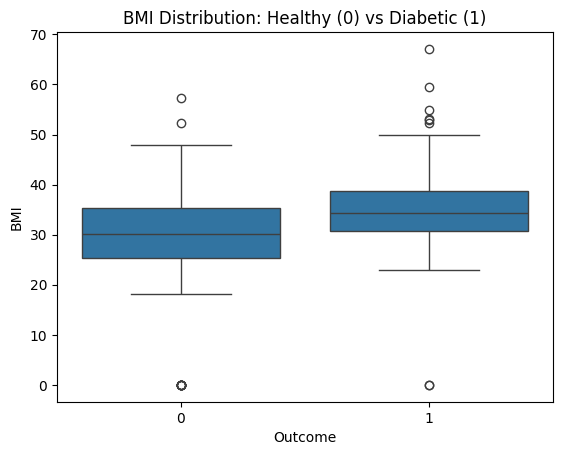

Questions shape: (768, 8)
Answers shape: (768,)
Training patients: 614
Testing patients: 154
Training model...
Training complete! The model has learned the patterns in the data.
Model Guesses: [0 0 0 0 0 0 0 1 1 1]
Actual Answers: [0 0 0 0 0 0 0 0 0 0]
Model Accuracy: 0.7467532467532467


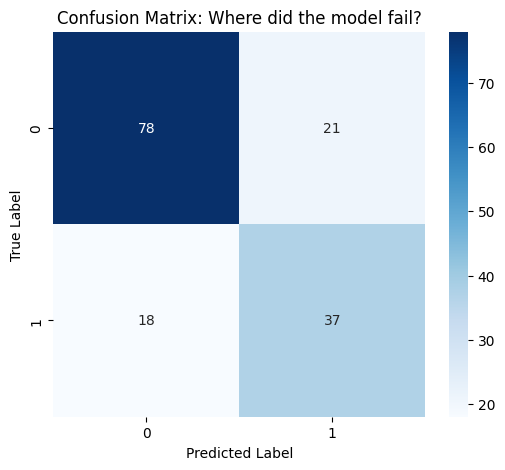

Training the Random Forest model...
New Accuracy (Random Forest): 0.7207792207792207


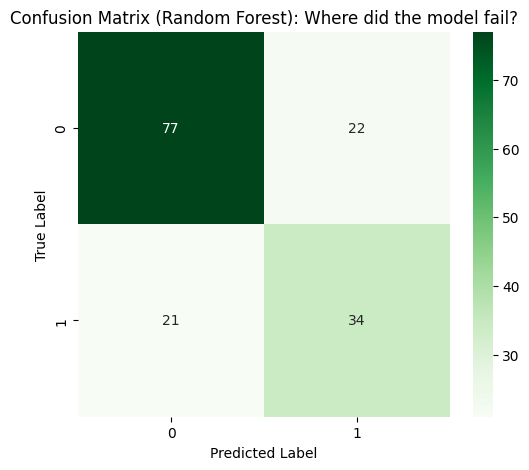

In [27]:
import pandas as pd
import numpy as np
r_data = {
    'Patient_ID': [101, 102, 103, 104, 105, 106],
    'Age': [25, 34, np.nan, 45, 29, 52],
    'Weight': [70, 85, 65, "72kg", 95, 60],
    'Malaria_Test': ['Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative']
}
df_temp = pd.DataFrame(r_data)
df_temp.to_csv('clinic_raw_data.csv', index=False)
print("File 'clinic_raw_data.csv' had been created!")
df = pd.read_csv('clinic_raw_data.csv')
print("---Raw Data---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
df["Weight"] = df["Weight"].astype(str).str.replace('kg', '')
df['Weight'] = pd.to_numeric(df['Weight'])
avg_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(avg_age)
print("--- Cleaned Data ---")
print(df)
summary = df.groupby('Malaria_Test').agg({'Age': 'mean', 'Weight': 'mean'})
print("--- Summary ---")
print(summary)
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
print("Downloading data from the cloud...")
df = pd.read_csv(url)
df.head()
report = df.groupby('Outcome')['Glucose'].mean()
print("Average Glucose Levels:")
print(report)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI Distribution: Healthy (0) vs Diabetic (1)")
plt.show()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print("Questions shape:", X.shape)
print("Answers shape:", y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training patients:", len(X_train))
print("Testing patients:", len(X_test))
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
print("Training model...")
model.fit(X_train, y_train)
print("Training complete! The model has learned the patterns in the data.")
predictions = model.predict(X_test)
print("Model Guesses:", predictions[:10])
print("Actual Answers:", y_test[:10].values)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print("Model Accuracy:", score)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Where did the model fail?")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
new_score = accuracy_score(y_test, rf_predictions)
print("New Accuracy (Random Forest):", new_score)
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest): Where did the model fail?")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()